In [1]:
#Level 2

In [2]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from sklearn.cluster import KMeans

In [3]:
#Reading the dataset
df = pd.read_csv("Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
#Getting more information regarding the dataset
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [5]:
#Checking for null values
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
#Task 1:- Restaurant Ratings

#Analyze the distribution of aggregate ratings and determine the most common rating range.

#Calculate the average number of votes received by restaurants.

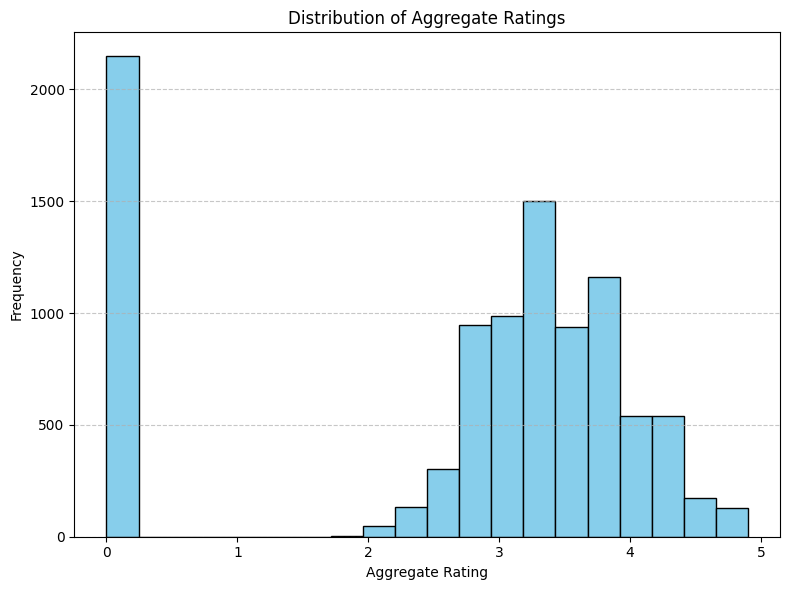

Most common rating range: 0.0


In [7]:
#Analyze the distribution of aggregate ratings and determine the most common rating range.

# Plotting a histogram of the distribution of aggregate ratings
plt.figure(figsize=(8, 6))
plt.hist(df['Aggregate rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Determining the most common rating range
rating_counts = df['Aggregate rating'].value_counts()
most_common_rating_range = rating_counts.idxmax()

print("Most common rating range:", most_common_rating_range)

In [8]:
#Calculate the average number of votes received by restaurants.

# Calculating the average number of votes received by restaurants
average_votes_received = df['Votes'].mean()

print("Average number of votes received by restaurants:", average_votes_received)

Average number of votes received by restaurants: 156.909747670401


In [9]:
#Task 2:- Cuisine Combination

#Identify the most common combinations of cuisines in the dataset.

#Determine if certain cuisine combinations tend to have higher ratings.

In [10]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [11]:
#Identify the most common combinations of cuisines in the dataset.

# Dropping rows (count is 9) with missing values in 'Cuisines' column
df = df.dropna(subset=['Cuisines'])

# Splitting the combinations of cuisines and creating a list of all unique combinations
all_cuisine_combinations = df['Cuisines'].str.split(',').explode().str.strip().value_counts()

print("Most common combinations of cuisines:")
all_cuisine_combinations.head()  

Most common combinations of cuisines:


Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Name: count, dtype: int64

In [12]:
#Determine if certain cuisine combinations tend to have higher ratings.

# Splitting the combinations of cuisines and creating a list of all unique combinations
df['Cuisine Combinations'] = df['Cuisines'].str.split(',')
df_exploded = df.explode('Cuisine Combinations')

# Calculating the average rating for each unique combination of cuisines
average_rating_by_cuisine_combination = df_exploded.groupby('Cuisine Combinations')['Aggregate rating'].mean()

print("Average rating for each unique combination of cuisines:")
average_rating_by_cuisine_combination.sort_values(ascending=False).head()

Average rating for each unique combination of cuisines:


Cuisine Combinations
Sunda         4.900000
Scottish      4.700000
 B�_rek       4.700000
Cajun         4.700000
 Caribbean    4.666667
Name: Aggregate rating, dtype: float64

In [13]:
#Task 3:- Geographic Analysis

#Plot the locations of restaurants on a map using longitude and latitude coordinates.

#Identify any patterns or clusters of restaurants in specific areas.

In [14]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cuisine Combinations
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,"[French, Japanese, Desserts]"
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,[Japanese]
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,"[Seafood, Asian, Filipino, Indian]"
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,"[Japanese, Sushi]"
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,"[Japanese, Korean]"


In [15]:
#Plot the locations of restaurants on a map using longitude and latitude coordinates.

# Creating a map centered at the mean latitude and longitude
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)

# Adding markers for each restaurant
marker_cluster = MarkerCluster().add_to(mymap)
for idx, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(marker_cluster)

# Displaying the map
mymap.save('restaurants_map.html')

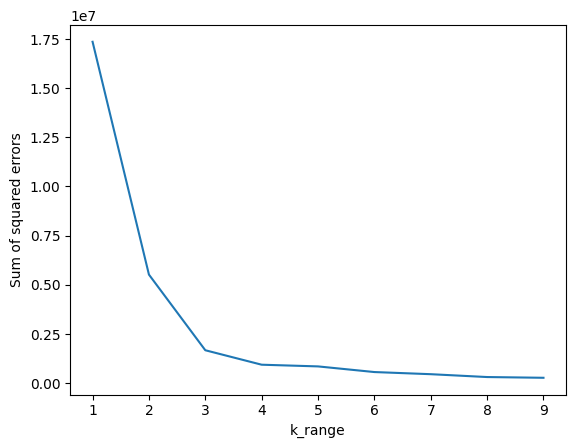

In [16]:
#Identify any patterns or clusters of restaurants in specific areas.

# Performing K-means clustering
#Applying Elbow Technique
k_range=range(1,10)
sse=[]
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[["Latitude","Longitude"]])
    sse.append(km.inertia_)
plt.xlabel("k_range")
plt.ylabel("Sum of squared errors")
plt.plot(k_range,sse)



In [17]:
#Predicting the clusters
coordinates = df[['Latitude', 'Longitude']]
k=4
kmeans = KMeans(n_clusters=k, random_state=0).fit(coordinates)
df['Cluster'] = kmeans.labels_

# Creating a map centered at the mean latitude and longitude
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)

# Add markers for each restaurant, color-coded by cluster
colors = ['red', 'blue', 'green', 'purple'] 
for idx, row in df.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']], radius=5, color=colors[row['Cluster']], fill=True, fill_color=colors[row['Cluster']], fill_opacity=0.7, popup=row['Restaurant Name']).add_to(mymap)

# Display the map
mymap.save('restaurant_clusters_map.html')

In [18]:
#Task 4:- Restaurant Chains

#Identify if there are any restaurant chains present in the dataset.

#Analyze the ratings and popularity of different restaurant chains.

In [19]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cuisine Combinations,Cluster
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,"[French, Japanese, Desserts]",0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,[Japanese],0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,"[Seafood, Asian, Filipino, Indian]",0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,"[Japanese, Sushi]",0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,"[Japanese, Korean]",0


In [20]:
#Identify if there are any restaurant chains present in the dataset.

# Grouping restaurants by name and counting the number of occurrences
restaurant_counts = df['Restaurant Name'].value_counts()

# Filtering out restaurants with more than one occurrence (potential chains)
restaurant_chains = restaurant_counts[restaurant_counts > 1]

print("Restaurant chains present in the dataset:")
print(restaurant_chains)

Restaurant chains present in the dataset:
Restaurant Name
Cafe Coffee Day                   83
Domino's Pizza                    79
Subway                            63
Green Chick Chop                  51
McDonald's                        48
                                  ..
Zaika Kathi Rolls                  2
The Night Owl                      2
The Cheesecake Factory             2
New Kadimi                         2
Ceviche Tapas Bar & Restaurant     2
Name: count, Length: 734, dtype: int64


In [21]:
#Analyze the ratings and popularity of different restaurant chains.

# Grouping restaurants by name and calculating the average rating and total votes for each chain
chain_stats = df.groupby('Restaurant Name').agg({'Aggregate rating': 'mean', 'Votes': 'sum'})

# Sorting chains by average rating or total votes
chain_stats_sorted_by_rating = chain_stats.sort_values(by='Aggregate rating', ascending=False)
chain_stats_sorted_by_votes = chain_stats.sort_values(by='Votes', ascending=False)

print("Top restaurant chains by average rating:")
print(chain_stats_sorted_by_rating.head())  

print("\nTop restaurant chains by total votes:")
print(chain_stats_sorted_by_votes.head())

Top restaurant chains by average rating:
                               Aggregate rating  Votes
Restaurant Name                                       
Mirchi And Mime                             4.9   3244
Yellow Dog Eats                             4.9   1252
Tresind - Nassima Royal Hotel               4.9   1352
Ingleside Village Pizza                     4.9    478
Indian Accent - The Manor                   4.9   1934

Top restaurant chains by total votes:
                           Aggregate rating  Votes
Restaurant Name                                   
Barbeque Nation                    4.353846  28142
AB's - Absolute Barbecues          4.825000  13400
Toit                               4.800000  10934
Big Chill                          4.475000  10853
Farzi Cafe                         4.366667  10098
